<a href="https://colab.research.google.com/github/Auusi/Clustering/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from itertools import combinations

In [ ]:
ruta_de_archivos = '/content/drive/MyDrive/AAAUPSO/Crimenes.csv'
dataframe = pd.read_csv(ruta_de_archivos)
df = dataframe.copy ()

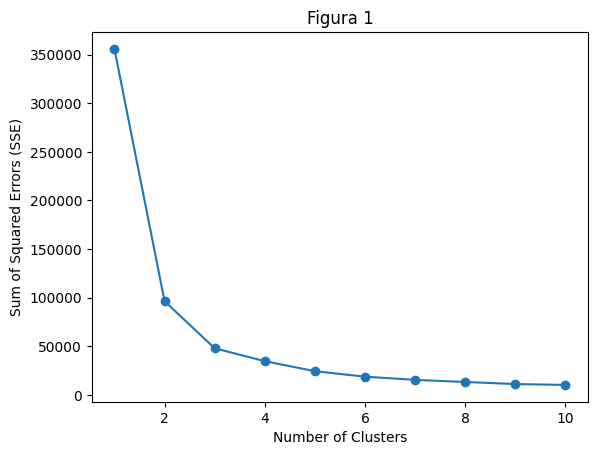

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def find_optimal_clusters_kmeans(data, max_k):
    sse = []  # Sum of squared errors
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, n_init=10).fit(data)
        sse.append(kmeans.inertia_)

    plt.plot(range(1, max_k + 1), sse, 'o-')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Sum of Squared Errors (SSE)")
    plt.title("Figura 1")
    plt.show()


find_optimal_clusters_kmeans(df[['Asesinatos', 'Asaltos', 'Poblacion Urbana', 'Violaciones']], 10)


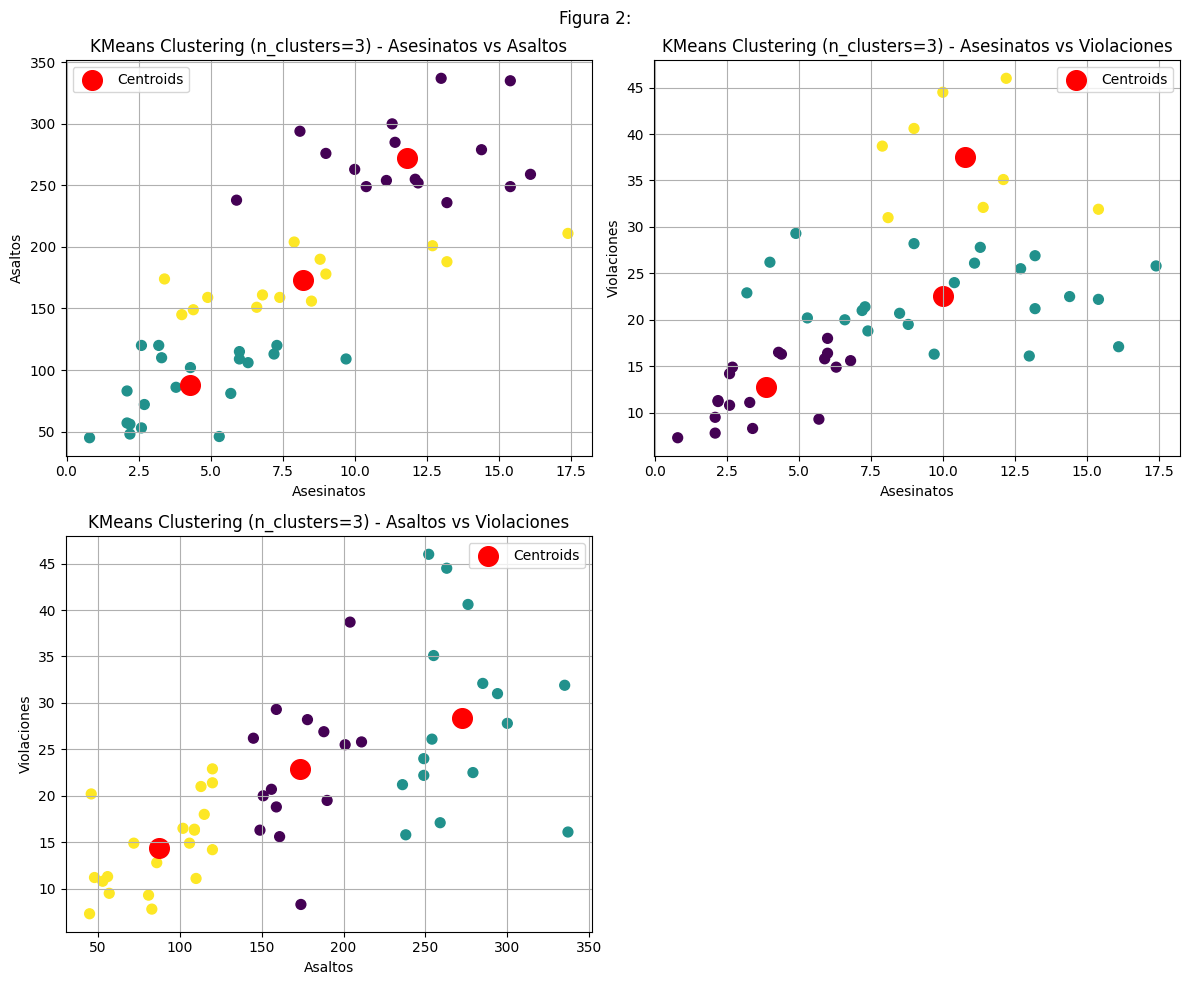

In [ ]:
# Supongamos que 'df' es tu DataFrame

# Seleccionar las columnas relevantes
features = ['Asesinatos', 'Asaltos', 'Violaciones']

# Generar todas las combinaciones posibles de 2 columnas
column_combinations = list(combinations(features, 2))

# Calcular el número de subgráficas necesarias
num_plots = len(column_combinations)

# Configurar el diseño de la figura
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

# Iterar sobre las combinaciones y realizar clustering KMeans
for i, combination in enumerate(column_combinations):
    # Seleccionar las columnas para la combinación actual
    data = df[list(combination)].values

    # Aplicar KMeans con n_clusters=3
    kmeans = KMeans(n_clusters=3, n_init=10)
    clusters = kmeans.fit_predict(data)
    # Graficar los resultados en la subgráfica actual
    axes[i].scatter(data[:, 0], data[:, 1], c=clusters, s=50, cmap='viridis')
    axes[i].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='o', label="Centroids")

    # Etiquetas y título
    axes[i].set_title(f'KMeans Clustering (n_clusters=3) - {combination[0]} vs {combination[1]}')
    axes[i].set_xlabel(combination[0])
    axes[i].set_ylabel(combination[1])
    axes[i].legend()
    axes[i].grid(True)

# Eliminar la última subgráfica vacía
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])


plt.suptitle('Figura 2:')
plt.tight_layout()

plt.show()

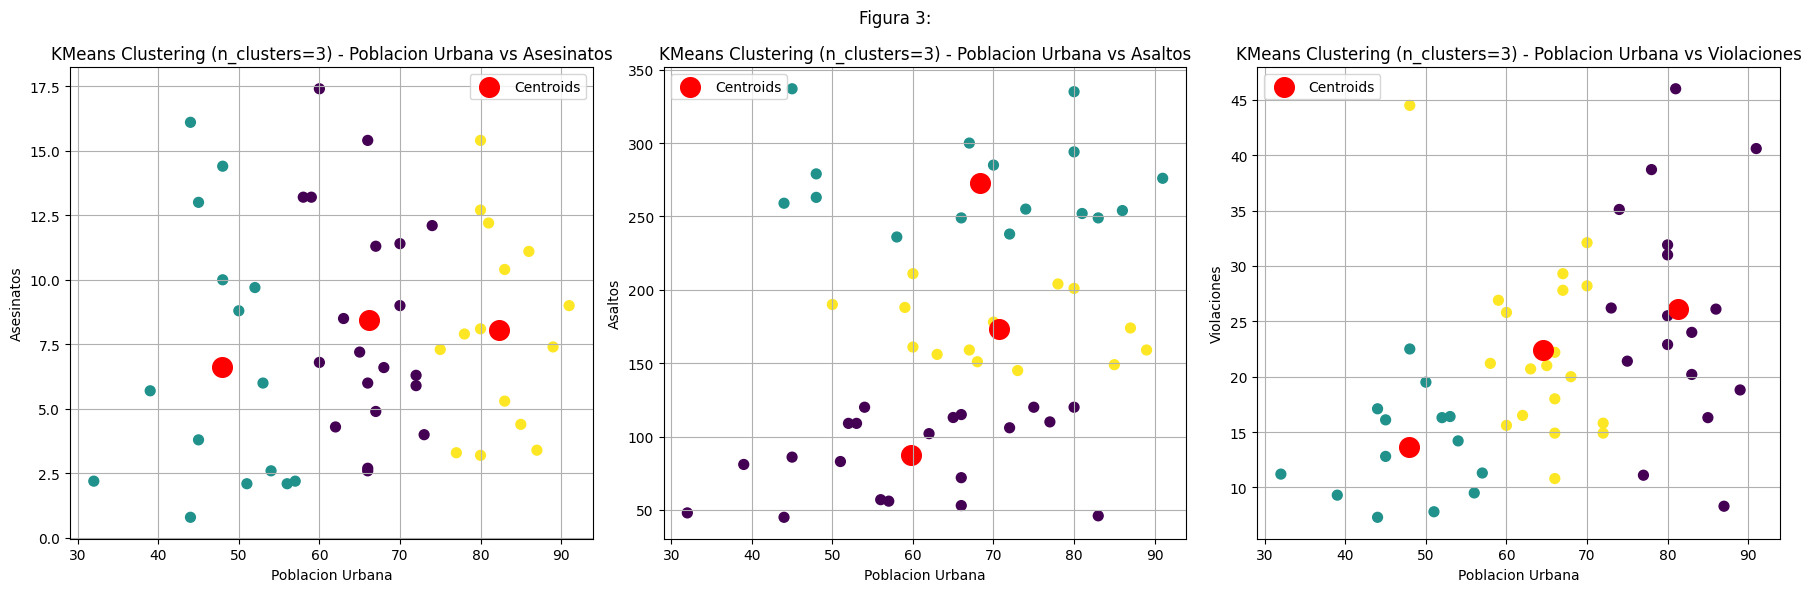

In [ ]:

# Seleccionar las combinaciones deseadas
desired_combinations = [('Poblacion Urbana', 'Asesinatos'),
                        ('Poblacion Urbana', 'Asaltos'),
                        ('Poblacion Urbana', 'Violaciones')]

# Configurar el diseño de la figura
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Iterar sobre las combinaciones deseadas y realizar clustering KMeans
for i, combination in enumerate(desired_combinations):
    # Seleccionar las columnas para la combinación actual
    data = df[list(combination)].values

    # Aplicar KMeans con n_clusters=3
    kmeans = KMeans(n_clusters=3, n_init=10)
    clusters = kmeans.fit_predict(data)

    # Graficar los resultados en la subgráfica actual
    axes[i].scatter(data[:, 0], data[:, 1], c=clusters, s=50, cmap='viridis')
    axes[i].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='o', label="Centroids")

    # Etiquetas y título
    axes[i].set_title(f'KMeans Clustering (n_clusters=3) - {combination[0]} vs {combination[1]}')
    axes[i].set_xlabel(combination[0])
    axes[i].set_ylabel(combination[1])
    axes[i].legend()
    axes[i].grid(True)

# Ajustes de diseño
plt.suptitle('Figura 3:')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


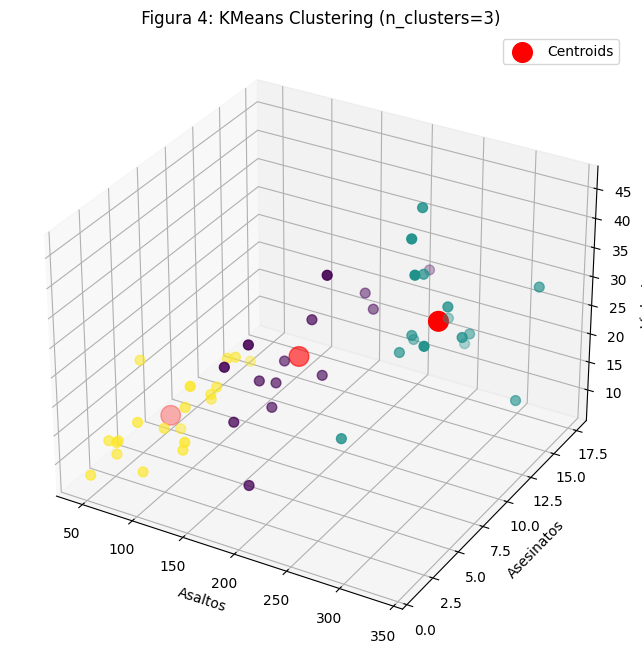

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Supongamos que 'data' es tu conjunto de datos (asegúrate de tener los datos que deseas usar)
data = df[['Asaltos', 'Asesinatos', 'Violaciones', 'Poblacion Urbana']].values

# Aplicar KMeans con n_clusters=3
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(data)

# Obtener las asignaciones de cluster para cada estado
cluster_assignments = kmeans.predict(data)

# Agregar la información de cluster al DataFrame original
df['Cluster'] = cluster_assignments

# Graficar los resultados
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=clusters, s=50, cmap='viridis')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
           s=200, c='red', marker='o', label="Centroids")

ax.set_title(' Figura 4: KMeans Clustering (n_clusters=3)')
ax.set_xlabel("Asaltos")
ax.set_ylabel("Asesinatos")
ax.set_zlabel("Violaciones")
ax.legend()


plt.show()

In [ ]:
# Calcular la media para cada cluster
cluster_means = df.groupby('Cluster')[['Asesinatos', 'Asaltos', 'Violaciones', 'Poblacion Urbana']].mean()

# Visualizar la media de cada cluster
print(cluster_means)

         Asesinatos     Asaltos  Violaciones  Poblacion Urbana
Cluster                                                       
0         11.812500  272.562500    28.375000         68.312500
1          4.270000   87.550000    14.390000         59.750000
2          8.214286  173.285714    22.842857         70.642857


se puede obserbar que la cantidad de poblacion no es proporcional al crimen (figura 3 y medias de cada cluster)(en las violaciones si hay mas correlacion)

en cambio tmb se pude observar que los crimenes si son correlativos entre si, (mientras mas asaltos mas homicidios etc) (figura 2)

